In [1]:
import tensorflow as tf
import keras.backend as K 
config = tf.ConfigProto(log_device_placement=True, allow_soft_placement=True, device_count = {'GPU': 2})
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(session=sess)

Using TensorFlow backend.


In [17]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0',
 '/job:localhost/replica:0/task:0/device:GPU:1']

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.utils import to_categorical

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) /255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) /255

In [6]:
y_train = to_categorical(y_train)    
y_test = to_categorical(y_test)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
y_train.shape

(60000, 10)

In [9]:
y_train[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_train.shape[1:]

(28, 28, 1)

In [12]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=X_train.shape[1:], activation="relu"))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(y_test.shape[-1], activation="softmax"))

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train, epochs=10, verbose=1, batch_size=256)

Epoch 1/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.9404 - acc: 0.7573
Epoch 2/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.3053 - acc: 0.9147
Epoch 3/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.2241 - acc: 0.9361
Epoch 4/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1815 - acc: 0.9486
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1544 - acc: 0.9559
Epoch 6/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1354 - acc: 0.9609
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1225 - acc: 0.9644
Epoch 8/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.1125 - acc: 0.9673
Epoch 9/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.1046 - acc: 0.9694
Epoch 10/10
60000/60000 [==============================] - 2s 36us/step - loss: 0.0988 - acc: 0.971

In [15]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 3s 282us/step


[0.08995410857275128, 0.9736]

In [26]:
y_hat = np.argmax(model.predict(np.array([X_test[-1]])))
y_true = np.argmax(y_test[-1])
print(y_hat, y_true)

6 6


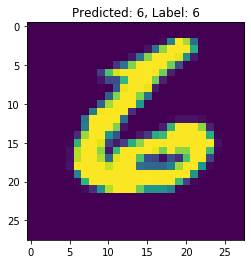

In [30]:
plt.title(f"Predicted: {y_hat}, Label: {y_true}")
plt.imshow(X_test[-1].reshape(28, 28))
plt.show()